# SYDE 556/750 --- Assignment 2

**Student ID: 20772297**

_Note:_ Please include your numerical student ID only, do _not_ include your name.

_Note:_ Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.


In [329]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']


# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.


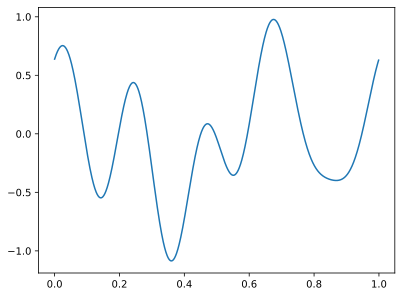

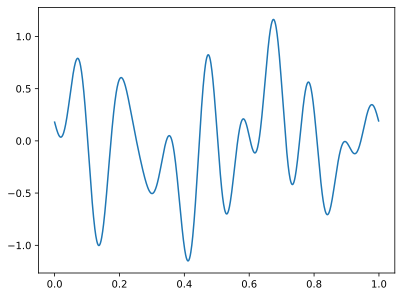

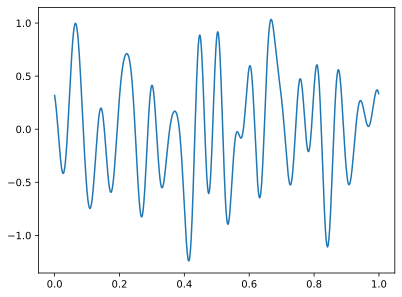

In [330]:


# def generate_signal(T, dt, rms, limit, seed):
#     np.random.seed(seed)
#     N = int(T/dt)
#     t = np.arange(N)*dt
#     limit_rad = limit#*np.pi/T 
#     #TODO do i need to convert limit to rads
#     fs = np.fft.fftshift(np.fft.fftfreq(len(t), dt)) 
#     f_real = np.random.normal(0, 1, N)
#     f_imag = np.random.normal(0, 1, N)
#     f_signal_X = f_real + 1j*f_imag
#     # f_signal_X[len(f_signal_X)//2:] = np.conj(f_signal_X[0:len(f_signal_X)//2][::-1])
#     f_signal_X = f_signal_X[:len(f_signal_X)//2]
#     f_signal_X = np.concatenate((f_signal_X, np.flip(np.conj(f_signal_X))))
#     f_signal_X[np.abs(fs) > limit_rad] = 0
#     t_signal_x = np.fft.ifft(np.fft.ifftshift(f_signal_X)).real
#     t_signal_x =t_signal_x/np.sqrt(np.mean(t_signal_x**2))*rms
    
#     # f_signal_X = np.fft.ifft(t_signal_x)
#     f_signal_X=f_signal_X/np.sqrt(np.mean(t_signal_x**2))*rms

#     return t, t_signal_x, fs, f_signal_X

def generate_signal(T, dt, rms, limit, seed):
    np.random.seed(seed)
    N = int(T/dt)
    t = np.arange(N)*dt
    limit_rad = limit
    fs = np.fft.fftshift(np.fft.fftfreq(N, dt))
    t_signal_x = np.random.normal(0, 1, N)
    f_signal_X = np.fft.fft(t_signal_x)
    f_signal_X = np.fft.fftshift(f_signal_X)
    # f_signal_X[fs < -limit_rad] = 0
    f_signal_X[np.abs(fs) > limit_rad] = 0
    t_signal_x = np.real(np.fft.ifft(np.fft.ifftshift(f_signal_X)))
    t_signal_x = t_signal_x*rms/np.sqrt(np.mean(t_signal_x**2))
    f_signal_X = f_signal_X*rms/np.sqrt(np.mean(t_signal_x**2))
    return t, t_signal_x, fs, f_signal_X


def plot_1_1():
    for limit in [5, 10, 20]:
        t, time_domain_signal, fs, freq_domain_signal = generate_signal(1, 0.001, 0.5, limit, 18945)
        plt.plot(t, time_domain_signal)
        plt.show()
plot_1_1()


**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.


(100, 4, 1000)
(100, 1000)
(1000,)


c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


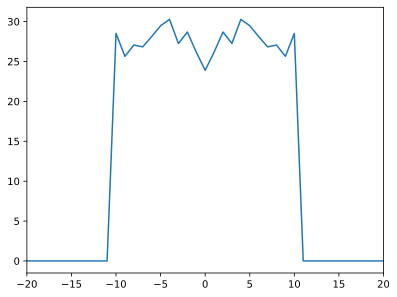

In [331]:
def plot_average_power_spectrum(T, dt, rms, limit, seed, num_signals=100):

    total = np.array([generate_signal(T, dt, rms, limit, seed+i)
                 for i in range(num_signals)])
    print(total.shape)
    f_signals = np.abs(total[:, 3,:])
    fs = np.mean(total[:,2,:],axis=0)

    print(f_signals.shape)
    print(fs.shape)
    # total = []

    # for i in range(num_signals):
    #     t, time_domain_signal, fs, freq_domain_signal = generate_signal(T, dt, rms, limit, seed+i)
    #     total+=freq_domain_signal
    # avg_signal = total/num_signals
    


    avg_signal = np.mean(f_signals, axis=0)
    plt.plot(fs,avg_signal)
    plt.xlim(-20, 20)

plot_average_power_spectrum(1, 0.001, 0.5, 10, 18945)


## 1.2 Gaussian power spectrum noise


**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.


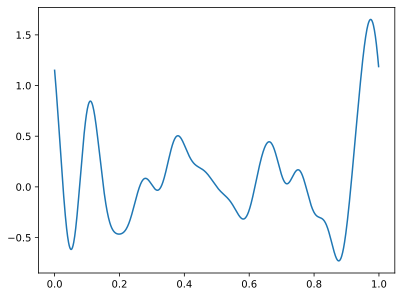

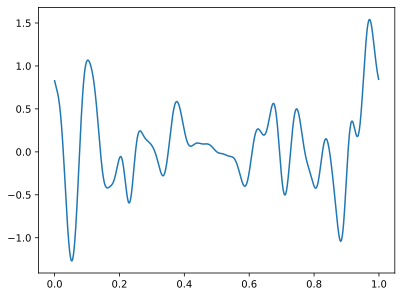

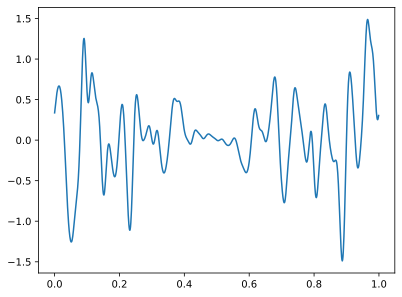

In [332]:
def generate_signal_smooth(T, dt, rms, bandwidth, seed):
    np.random.seed(seed)
    N = int(T/dt)
    t = np.arange(N)*dt
    #TODO do i need to convert limit to rads
    fs = np.fft.fftshift(np.fft.fftfreq(len(t), dt))
    sigma = np.exp(-fs[len(fs)//2:]**2/(2*bandwidth**2))
    f_real = np.random.normal(0, sigma, N//2)
    f_imag = np.random.normal(0, sigma, N//2)
    f_signal_X = f_real + 1j*f_imag
    
    # for i in range(len(f_signal_X)//2):
    #     f_signal_X[i] = np.conj(f_signal_X[len(f_signal_X)//2-i])
    # f_signal_X[len(f_signal_X)//2:] = np.conj(f_signal_X[0:len(f_signal_X)//2][::-1])
    f_signal_X = np.concatenate((f_signal_X, np.flip(np.conj(f_signal_X))))
    f_signal_x = np.fft.fftshift(f_signal_X)
    t_signal_x = np.fft.ifft(f_signal_X).real
    t_signal_x =t_signal_x/np.sqrt(np.mean(t_signal_x**2))*rms
    f_signal_X=f_signal_X/np.sqrt(np.mean(t_signal_x**2))*rms
    f_signal_X = np.fft.fftshift(f_signal_X)

    return t, t_signal_x, fs, f_signal_X

def plot_1_2():
    for bandwidth in [5, 10, 20]:
        t, time_domain_signal, fs, freq_domain_signal = generate_signal_smooth(1, 0.001, 0.5, bandwidth, 18945)
        plt.plot(t, time_domain_signal)
        plt.show()
plot_1_2()



In [333]:

# def generate_signal_smooth(T, dt, rms, bandwidth, seed):
#     np.random.seed(seed)
#     N = int(T/dt)
#     t = np.arange(N)*dt
#     fs = np.fft.fftshift(np.fft.fftfreq(N, dt))
#     sigma = np.exp(-fs**2/(2*bandwidth**2))

#     t_signal_x = np.random.normal(0, sigma, N)
#     f_signal_X = np.fft.fft(t_signal_x)
#     f_signal_X = np.fft.fftshift(f_signal_X)
#     # f_signal_X[fs < -limit_rad] = 0
#     t_signal_x = np.real(np.fft.ifft(np.fft.ifftshift(f_signal_X)))
#     t_signal_x = t_signal_x*rms/np.sqrt(np.mean(t_signal_x**2))
#     f_signal_X = f_signal_X*rms/np.sqrt(np.mean(t_signal_x**2))
#     return t, t_signal_x, fs, f_signal_X

# def generate_signal_smooth(T, dt, rms, bandwidth, seed):
#     np.random.seed(seed)
#     N = int(T/dt)
#     t = np.arange(N)*dt
#     # limit_rad = limit#*np.pi/T
#     fs = np.fft.fftshift(np.fft.fftfreq(len(t), dt))

#     t_signal_x = np.random.normal(0, np.exp(-fs**2/(2*bandwidth**2)), N)
#     f_signal_X = np.fft.fft(t_signal_x)
#     f_signal_X = np.fft.fftshift(f_signal_X)
#     t_signal_x = np.real(np.fft.ifft(np.fft.ifftshift(f_signal_X)))
#     t_signal_x = t_signal_x/np.sqrt(np.mean(t_signal_x**2))*rms
#     return t, t_signal_x, fs, f_signal_X,



**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.


(100, 4, 1000)


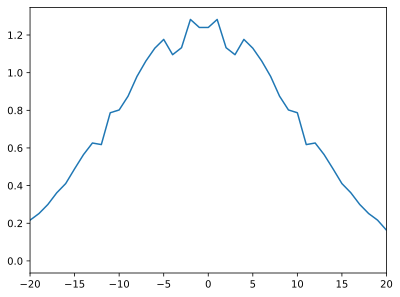

In [334]:
def plot_average_power_spectrum_bandwith(T, dt, rms, limit, seed, num_signals=100, bandwith=0.1):

    # total = np.array([generate_signal_smooth(T, dt, rms, bandwith, seed+i)
    #              for i in range(num_signals)])
    # f_signals = total[:, 3,:]
    # fs = np.mean(total[:,2,:],axis=0)



    # avg_signal = np.abs(np.mean(f_signals, axis=0))
    # plt.plot(fs,avg_signal)
    # plt.xlim(int(-limit*1.2), int(limit*1.2))

    total = np.array([generate_signal_smooth(T, dt, rms, limit, seed+i)
                 for i in range(num_signals)])
    print(total.shape)
    f_signals = np.abs(total[:, 3,:])
    fs = np.mean(total[:,2,:],axis=0)

    # total = []

    # for i in range(num_signals):
    #     t, time_domain_signal, fs, freq_domain_signal = generate_signal(T, dt, rms, limit, seed+i)
    #     total+=freq_domain_signal
    # avg_signal = total/num_signals
    


    avg_signal = np.mean(f_signals, axis=0)
    plt.plot(fs,avg_signal)
    plt.xlim(-20, 20)

plot_average_power_spectrum_bandwith(1, 0.001, 0.5, 10, 18945, bandwith=10)


# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.


In [335]:
max_j = 1/(1 - np.exp(0.002/0.02 - 1/(150 * 0.02)))
jb = 1/(1 - np.exp(0.002/0.02 - 1/(40 * 0.02)))
alpha = max_j - jb
max_j
jb
np.concatenate((np.full((1000, 1), jb), np.full((1000, 1), jb + alpha*1)), 1)
max_j,jb,alpha

(4.805141108966614, 1.4633506094428541, 3.34179049952376)

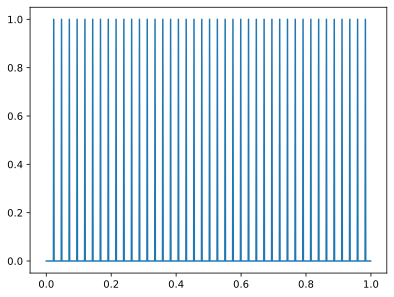

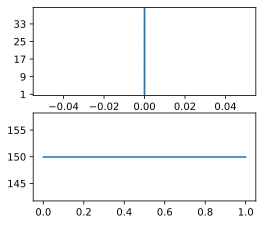

In [356]:
def LIF_firing_rate(J,tref=0.002,trc=0.02):
    return np.where(J>1,1/(tref - trc*np.log(1-1/J)),0)
def rasterplot(ax, ts, A):
    n = A.shape[0]
    color = matplotlib.cm.get_cmap('tab10')(0)
    for i in range(n):
        for t in ts[np.where(A[ i] != 0)]:
            ax.plot([t, t], [i + 0.5, i + 1.5], color=color)
    ax.set_ylim(0.5, n + 0.5)
    if n < 5:
        ax.set_yticks(list(range(1, n + 1)))
    else:
        ax.set_yticks(list(range(1, n + 1, int(np.ceil(n / 5)))))


def generate_activity_lif(num_samples,input,firing=LIF_firing_rate,tref=0.002,trc=0.02):
    x = np.array([input for i in range(num_samples)])
    a_max = np.random.uniform(100, 200)
    zeta = np.random.uniform(-0.95, 0.95)
    e = 1
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1 -1
    alpha = 3.34
    xmin = 40
    xmax = 150
    J_bias = (1 - np.exp((tref*xmin - 1)/(trc*xmin)))**-1
    alpha = (1 - np.exp((tref*xmax - 1)/(trc*xmax)))**-1 - J_bias
    print(J_bias, alpha)

    encoded_x = x*e
    A_x = firing(alpha*encoded_x+ J_bias)
    spike_train = []
    time_train = []
    y=0
    t=0
    dt=0.001
    # for J in range(A_x):
    #     diff = 1/trc(J-1)
    #     y = y + diff*dt
    #     if y>0:
    #         spike_train.append(1)
            
    #         y=0
    #     if y<0:
    #         y=0
    #         spike_train.append(0)
    #     if J<0:
    #         J=0
        
    #     time_train.append(t)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 3.5))
    rasterplot(ax1, np.linspace(0,1,A_x.shape[0]), A_x)

       
    return A_x, x[0]



def lif_diff(v,trc=0.02,tref=0.002):
    return 1/trc *(4.8-v) #the j here is constant because x is constant alpha plus jbias in this case

def eulers_method(x_input, dt=0.001, t0=0, tf=1,trc=0.02,tref=0.002):
    t = np.arange(t0, tf, dt)
    xmin = 40
    xmax = 150
    J_bias = (1 - np.exp((tref*xmin - 1)/(trc*xmin)))**-1
    alpha = (1 - np.exp((tref*xmax - 1)/(trc*xmax)))**-1 - J_bias
    J_vals = alpha*x_input + J_bias


    volts = np.zeros(len(x_input))
    rasterplot = np.zeros(len(x_input))
    for i,J  in enumerate(J_vals):
        if i == 0:
            volts[i] = 0 + dt*(J - 0)/trc
        if volts[i-1] > 1:
            volts[i] = 0
            rasterplot[i] = 1

        
        else:
            volts[i] = volts[i-1] + dt*(J - volts[i-1])/trc
        




    # wait = 2
    # for i,J in enumerate(J_vals):
    #     x_input[i+1] = x_input[i] + dt*(4.8 - x_input[i])/trc
    #     if wait <2:
    #         wait +=1
    #     elif x_input[i+1] < 0:
    #         x_input[i+1] = 0
    #     elif x_input[i+1] > 1:
    #         x_input[i+1] = 0
    #         rasterplot.append(t[i+1])
    #         wait = 0
        



    return t, x_input , rasterplot


def q2_a():
    x_in = np.ones(1000)
    x_in = np.zeros(1000)

    t,x,raster = eulers_method(x_in,0.001)
    plt.plot(t,raster)


q2_a()



**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?


✍ \<YOUR SOLUTION HERE\>


**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.


In [337]:
# ✍ <YOUR SOLUTION HERE>


**d) Voltage over time.** Using the same $x(t)$ signal as in part _c)_, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.


In [338]:
# ✍ <YOUR SOLUTION HERE>


**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.


✍ \<YOUR SOLUTION HERE\>


In [339]:
# ✍ <YOUR SOLUTION HERE>


# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).


In [340]:
# ✍ <YOUR SOLUTION HERE>


**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.


In [341]:
# ✍ <YOUR SOLUTION HERE>


**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.


In [342]:
# ✍ <YOUR SOLUTION HERE>


# 4. Computing an optimal filter


**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).


In [343]:
def compute_optimal_filter(
    # Signal generated from your white noise generator
    x,
    # Fourier coefficients from your white noise generator
    X,
    # Spike train from the previous part
    spikes,
    # Time step size
    dt=1e-3
):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # !
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2
    assert spikes.shape[1] == Nt

    # !
    T = Nt * dt

    # !
    ts = np.arange(Nt) * dt - T / 2.0

    # !
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # !
    omega = fs * 2.0 * np.pi

    # !
    r = spikes[0] - spikes[1]

    # !
    R = np.fft.fftshift(np.fft.fft(r))

    # !
    sigma_t = 25e-3

    # !
    W2 = np.exp(-omega**2*sigma_t**2)

    # !
    W2 = W2 / sum(W2)

    # !
    CP = X*R.conjugate()

    # !
    WCP = np.convolve(CP, W2, 'same')

    # !
    RP = R*R.conjugate()

    # !
    WRP = np.convolve(RP, W2, 'same')

    # !
    XP = X*X.conjugate()

    # !
    WXP = np.convolve(XP, W2, 'same')

    # !
    H = WCP / WRP

    # !
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # !
    XHAT = H*R

    # !
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP


**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.


In [344]:
# ✍ <YOUR SOLUTION HERE>


**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).


In [345]:
# ✍ <YOUR SOLUTION HERE>


**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).


In [346]:
# ✍ <YOUR SOLUTION HERE>


**e) Discussion.** How do these spectra relate to the optimal filter?


✍ \<YOUR SOLUTION HERE\>


**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.


In [347]:
# ✍ <YOUR SOLUTION HERE>


**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?


✍ \<YOUR SOLUTION HERE\>


# Using post-synaptic currents as a filter

**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.


In [348]:
# ✍ <YOUR SOLUTION HERE>


**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?


✍ \<YOUR SOLUTION HERE\>


**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.


In [349]:
# ✍ <YOUR SOLUTION HERE>


**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?


✍ \<YOUR SOLUTION HERE\>


**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.


In [350]:
# ✍ <YOUR SOLUTION HERE>


**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.


In [351]:
# ✍ <YOUR SOLUTION HERE>


**g) Discussion.** How do the decodings from e) and f) compare? Explain.


✍ \<YOUR SOLUTION HERE\>
